In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [49]:
# store the data into dataframe 
df=pd.read_csv("C:\\Users\\YOUGANK\\Desktop\\New folder\\Employee-turnover.csv")

In [13]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [14]:
df.shape

(1470, 29)

In [15]:
df.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [16]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [19]:
attrition_count = pd.DataFrame(df['Attrition (Yes/No)'].value_counts())
attrition_count

,Attrition (Yes/No)
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x285a1d0d220>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

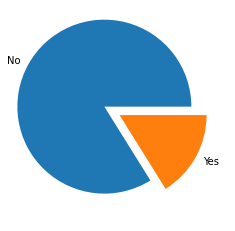

In [21]:
plt.pie(attrition_count['Attrition (Yes/No)'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

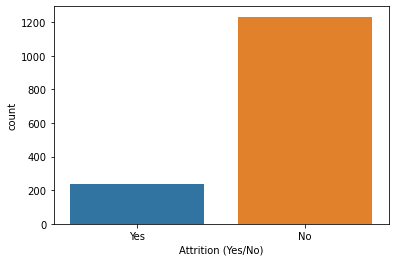

In [23]:
sns.countplot(df['Attrition (Yes/No)'])

In [26]:
df.drop(['Employee Count' , 'Employee ID'] , axis = 1)

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,No
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,No
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,23,Very High,...,17,5,2,0,3,High,3,Better,High,No
1466,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,6,Medium,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,4,Very High,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,2,Medium,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [27]:
attrition_dummies = pd.get_dummies(df['Attrition (Yes/No)'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [28]:
df = pd.concat([df, attrition_dummies] , axis = 1)
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No),No,Yes
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,4,0,5,Medium,0,Bad,Low,Yes,0,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,7,1,7,High,3,Better,Very High,No,1,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,0,0,0,Low,3,Bad,Medium,Yes,0,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,7,3,0,Very High,3,Better,High,No,1,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,2,2,2,Low,3,Better,Very High,No,1,0


In [29]:
df = df.drop(['Attrition (Yes/No)' , 'No'] , axis = 1)
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Yes
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,0


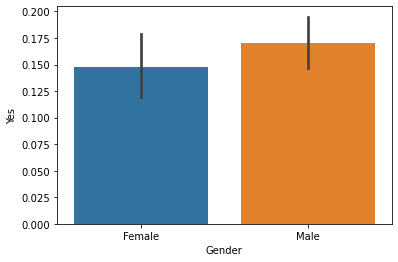

In [30]:
sns.barplot(x = 'Gender' , y = 'Yes', data = df)

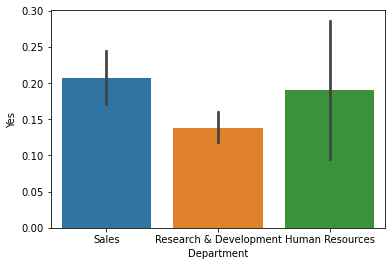

In [31]:
sns.barplot(x = 'Department', y = 'Yes', data = df)

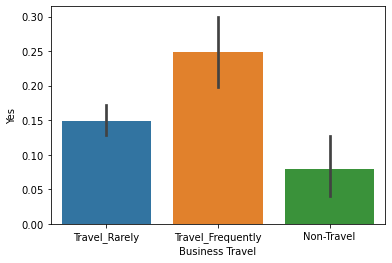

In [33]:
sns.barplot(x = 'Business Travel', y = 'Yes', data = df)

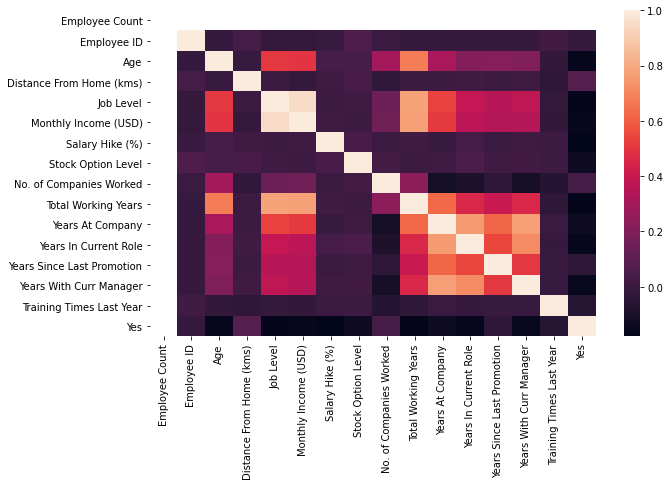

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

In [36]:
df = df.drop(['Age' , 'Job Level'], axis = 1)

In [37]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-37-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [39]:
x  = df.drop(['Yes'], axis = 1)
y = df['Yes']

In [40]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [41]:
x_train.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
338,0,338,2,7,0,0,0,2,2,4,...,1,10,10,9,1,2,3,2,2,0
363,0,363,2,8,0,2,0,2,2,4,...,1,1,1,0,0,0,3,2,0,2
759,0,759,0,1,1,2,4,3,2,23,...,1,6,6,3,0,4,2,3,2,1
793,0,793,1,2,1,0,2,1,2,14,...,1,4,4,2,2,2,1,5,3,3
581,0,581,1,2,1,1,0,1,2,0,...,3,7,2,2,0,2,3,2,2,0


In [42]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [43]:
rf.score(x_train, y_train)

0.9854227405247813

In [44]:
pred = rf.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, pred)

0.873015873015873

In [55]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


C:\Users\YOUGANK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\YOUGANK\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [56]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                   Logistic Regression: 87.98%
                   K-Nearest Neighbors: 81.86%
                         Decision Tree: 85.49%
Support Vector Machine (Linear Kernel): 61.22%
   Support Vector Machine (RBF Kernel): 84.13%
